In [1]:

import imgaug as ia
ia.seed(1)
# imgaug uses matplotlib backend for displaying images
%matplotlib inline
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug import augmenters as iaa 
# imageio library will be used for image input/output
import imageio
import pandas as pd
import numpy as np
import re
import os
import glob
# this library is needed to read XML files for converting it into CSV
import xml.etree.ElementTree as ET
import shutil
from PIL import Image
from PIL import Image, ImageEnhance

import gradio as gr

# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from tensorflow.keras.optimizers import RMSprop
 
img_width, img_height = 256, 256

plt.rcParams['figure.figsize'] = [15,8]

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the necessary packages
#from pyimagesearch import config
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import imutils
import cv2
import os

from skimage import data, exposure

from PIL import Image
import numpy as np
from skimage import transform
from skimage.color import rgb2gray

Found 520 files belonging to 2 classes.


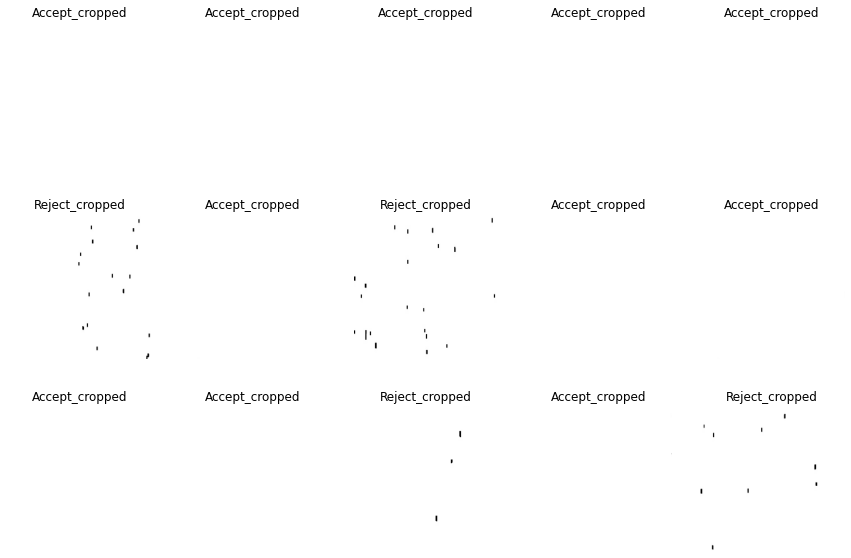

In [4]:
train_dataset = image_dataset_from_directory('C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images',
                                             shuffle=True,
                                             batch_size=32,image_size=(256,256))
class_name =  train_dataset.class_names
plt.figure(figsize = (15,10))
for image , label in train_dataset.take(1):
    for i in range(15) :
        plt.subplot(3,5,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [4]:
data_path = 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images'
#nb_train_samples =1028
#nb_validation_samples = 200
epochs = 10
batch_size = 50

In [5]:
# Using ImageDataGnerator

train_datagen1 = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2, #Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,# Float or [lower, upper]. Range for random zoom. 
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1.0/255,#If None or 0, no rescaling is applied.
    validation_split=0.3
    )
 
test_datagen1 = ImageDataGenerator(rescale=1./255)
 

In [6]:
train_generator1 = train_datagen1.flow_from_directory(
    data_path,
    target_size = (256, 256), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 64,#size of the batches of data (default: 32).
    class_mode = 'binary',#- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True,#whether to shuffle the data (default: True)
    subset='training',#Subset of data ("training" or "validation")
    seed = 123)

Found 365 images belonging to 2 classes.


In [7]:
validation_generator1 = train_datagen1.flow_from_directory(
    data_path,
    target_size = (256, 256), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 32,#size of the batches of data (default: 32).
    class_mode = 'binary',#- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True,#whether to shuffle the data (default: True)
    subset='validation',#Subset of data ("training" or "validation")
    seed = 123)

Found 155 images belonging to 2 classes.


#### Model 1

In [18]:
# Model 1

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization

model1=Sequential()

# Layer 1
model1.add(Conv2D(filters=32, kernel_size=(3,3) ,input_shape=(256,256,1), activation='relu'))
#model.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))
#model1.add(Dropout(0.2))

# Layer 2
model1.add(Conv2D(64,(3,3),activation='relu'))
#model.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))
#model1.add(Dropout(0.1))

# Layer 3
model1.add(Conv2D(128,(3,3),activation='relu'))
#model.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))
#model1.add(Dropout(0.1))

# Flattening
model1.add(Flatten())                      

# Dense Layer
#model1.add(Dense(512,activation='relu'))
#model1.add(Dense(128,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1,activation='sigmoid'))


In [19]:
# Model Compilation
model1.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [20]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [21]:
###### Considering this model for Analysis ###########

M2=model1.fit(train_generator1, epochs=100, verbose=1, validation_data=validation_generator1, shuffle=True)

Epoch 1/100
6/6 [==============================] - 50s 8s/step - loss: 0.9330 - accuracy: 0.4767 - val_loss: 0.7074 - val_accuracy: 0.4645
Epoch 2/100
6/6 [==============================] - 46s 8s/step - loss: 0.6938 - accuracy: 0.5205 - val_loss: 0.6931 - val_accuracy: 0.5613
Epoch 3/100
6/6 [==============================] - 49s 9s/step - loss: 0.6930 - accuracy: 0.4959 - val_loss: 0.6907 - val_accuracy: 0.5355
Epoch 4/100
6/6 [==============================] - 48s 8s/step - loss: 0.6931 - accuracy: 0.5342 - val_loss: 0.6916 - val_accuracy: 0.5355
Epoch 5/100
6/6 [==============================] - 47s 8s/step - loss: 0.6940 - accuracy: 0.5205 - val_loss: 0.6922 - val_accuracy: 0.5355
Epoch 6/100
6/6 [==============================] - 51s 8s/step - loss: 0.6935 - accuracy: 0.5342 - val_loss: 0.6913 - val_accuracy: 0.5355
Epoch 7/100
6/6 [==============================] - 50s 8s/step - loss: 0.6927 - accuracy: 0.5342 - val_loss: 0.6905 - val_accuracy: 0.5355
Epoch 8/100
6/6 [==========

In [22]:
# Saving the Model 
model1.save('hist_classification_weight.hdf5')

In [23]:
def plot_performance(model_history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.plot(model_history.history['accuracy'], 'b', label='train_acc')
    plt.plot(model_history.history['val_accuracy'], 'y', label='val_acc')
    plt.legend()
    plt.title("Train-Validation accuracy vs Epochs")
    plt.subplot(1,2,2)
    plt.grid(True)
    plt.plot(model_history.history['loss'], 'b--', label='train_loss')
    plt.plot(model_history.history['val_loss'], 'y--', label='val_loss')
    plt.title("Train-Validation Loss vs Epochs")
    plt.legend()
    plt.show()

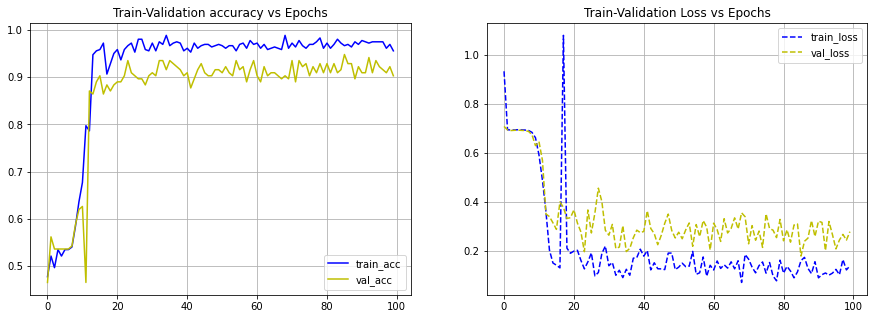

In [24]:
plot_performance(M2)

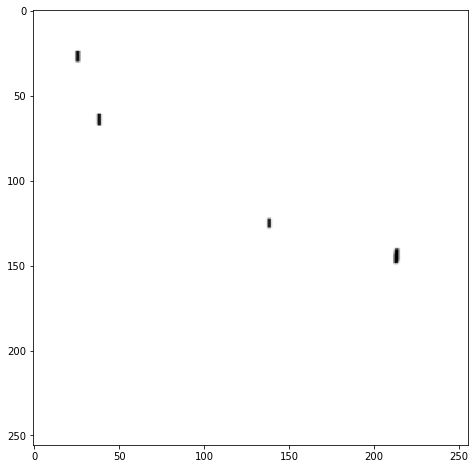

Predicted Class (0 - Accept , 1 - Reject):  1.0


In [25]:
# Reject Test Images

from skimage import data, exposure

from PIL import Image
import numpy as np
from skimage import transform
from skimage.color import rgb2gray

from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

inp = plt.imread('C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\Reject-A26491-001-Sample - 24-1...jpg')
inp = Image.fromarray(inp)
np_image = np.array(inp).astype('float32')/255
np_image = transform.resize(np_image, (256, 256, 1))
np_image = np.expand_dims(np_image, axis=0)
label = model1.predict(np_image)
plt.imshow(np_image.reshape(256,256),cmap='gray')
plt.show()
print("Predicted Class (0 - Accept , 1 - Reject): ", label[0][0])

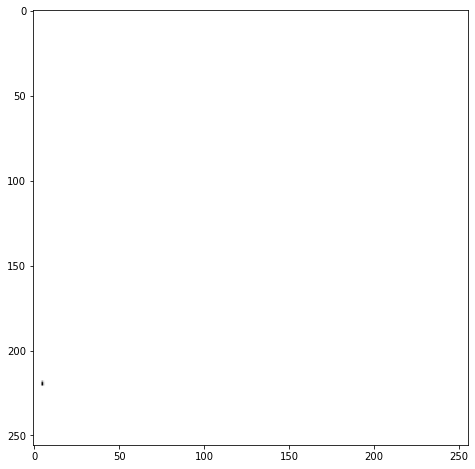

Predicted Class (0 - Accept , 1 - Reject):  0.04279679


In [26]:
inp = plt.imread('C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\Accept-A26491-001-Sample-67-1..jpg')
inp = Image.fromarray(inp)
np_image = np.array(inp).astype('float32')/255
np_image = transform.resize(np_image, (256, 256, 1))
np_image = np.expand_dims(np_image, axis=0)
label = model1.predict(np_image)
plt.imshow(np_image.reshape(256,256),cmap='gray')
plt.show()
print("Predicted Class (0 - Accept , 1 - Reject): ", label[0][0])

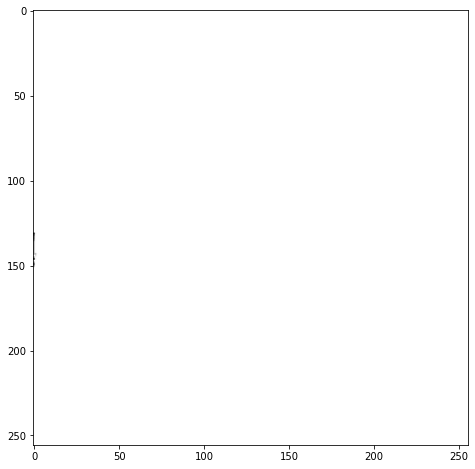

Predicted Class (0 - Accept , 1 - Reject):  0.042804033


In [27]:
# Accept Test Images

inp = plt.imread('C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample-26-1..jpg')
inp = Image.fromarray(inp)
np_image = np.array(inp).astype('float32')/255
np_image = transform.resize(np_image, (256, 256, 1))
np_image = np.expand_dims(np_image, axis=0)
label = model1.predict(np_image)
plt.imshow(np_image.reshape(256,256),cmap='gray')
plt.show()
print("Predicted Class (0 - Accept , 1 - Reject): ", label[0][0])

#### Model 2

In [11]:
# Model 3

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization

model2=Sequential()

# Layer 1
model2.add(Conv2D(filters=32, kernel_size=(3,3) ,input_shape=(256,256,1), activation='relu'))
#model.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

# Layer 2
model2.add(Conv2D(64,(3,3),activation='relu'))
#model.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.1))

# Layer 3
model2.add(Conv2D(128,(3,3),activation='relu'))
#model.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.1))

# Flattening
model2.add(Flatten())                      

# Dense Layer
#model1.add(Dense(512,activation='relu'))
#model1.add(Dense(128,activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1,activation='sigmoid'))


In [12]:
# Model Compilation
model2.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [13]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [14]:
M3=model2.fit(train_generator1, epochs=100, verbose=1, validation_data=validation_generator1,shuffle=True)

Epoch 1/100
6/6 [==============================] - 40s 6s/step - loss: 0.0000e+00 - accuracy: 0.5562 - val_loss: 0.0000e+00 - val_accuracy: 0.5355
Epoch 2/100
6/6 [==============================] - 43s 7s/step - loss: 0.0000e+00 - accuracy: 0.5342 - val_loss: 0.0000e+00 - val_accuracy: 0.5355
Epoch 3/100
6/6 [==============================] - 40s 7s/step - loss: 0.0000e+00 - accuracy: 0.5342 - val_loss: 0.0000e+00 - val_accuracy: 0.5355
Epoch 4/100
6/6 [==============================] - 39s 7s/step - loss: 0.0000e+00 - accuracy: 0.5342 - val_loss: 0.0000e+00 - val_accuracy: 0.5355
Epoch 5/100
4/6 [===================>..........] - ETA: 11s - loss: 0.0000e+00 - accuracy: 0.5273

KeyboardInterrupt: 

In [39]:
# Saving the Model 
model2.save('hist_classification_weight.hdf5')

In [40]:
def plot_performance(model_history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.plot(model_history.history['accuracy'], 'b', label='train_acc')
    plt.plot(model_history.history['val_accuracy'], 'y', label='val_acc')
    plt.legend()
    plt.title("Train-Validation accuracy vs Epochs")
    plt.subplot(1,2,2)
    plt.grid(True)
    plt.plot(model_history.history['loss'], 'b--', label='train_loss')
    plt.plot(model_history.history['val_loss'], 'y--', label='val_loss')
    plt.title("Train-Validation Loss vs Epochs")
    plt.legend()
    plt.show()

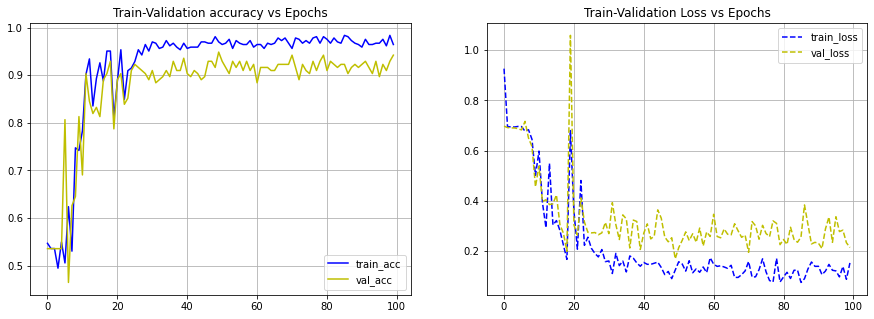

In [41]:
plot_performance(M3)

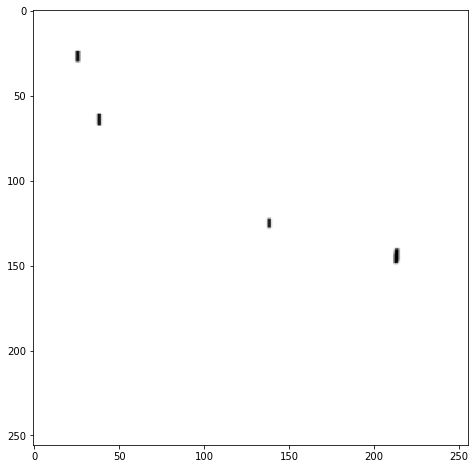

Predicted Class (0 - Accept , 1 - Reject):  1.0


In [42]:
# Reject Test Images

from skimage import data, exposure

from PIL import Image
import numpy as np
from skimage import transform
from skimage.color import rgb2gray

from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

inp = plt.imread('C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\Reject-A26491-001-Sample - 24-1...jpg')
inp = Image.fromarray(inp)
np_image = np.array(inp).astype('float32')/255
np_image = transform.resize(np_image, (256, 256, 1))
np_image = np.expand_dims(np_image, axis=0)
label = model2.predict(np_image)
plt.imshow(np_image.reshape(256,256),cmap='gray')
plt.show()
print("Predicted Class (0 - Accept , 1 - Reject): ", label[0][0])

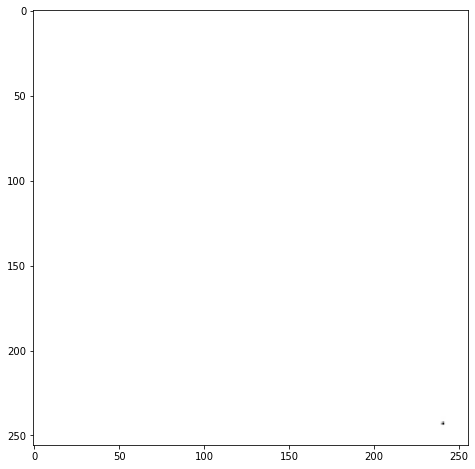

Predicted Class (0 - Accept , 1 - Reject):  0.02296707


In [44]:
# Reject Test Images

inp = plt.imread('C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\Accept-A26491-001-Sample-75-2..jpg')
inp = Image.fromarray(inp)
np_image = np.array(inp).astype('float32')/255
np_image = transform.resize(np_image, (256, 256, 1))
np_image = np.expand_dims(np_image, axis=0)
label = model2.predict(np_image)
plt.imshow(np_image.reshape(256,256),cmap='gray')
plt.show()
print("Predicted Class (0 - Accept , 1 - Reject): ", label[0][0])

#### Predicting and saving in CSV files

In [28]:
# Accept Images

header = ['Images','width','height','xmin','ymin','xmax','ymax','class']
dfa = pd.read_csv('hist_acc_final.csv',names=header)
dfa.head()

,Images,width,height,xmin,ymin,xmax,ymax,class
0,C:\Users\nabhishe\MITC_Project\reinforced_imag...,2652,2116,11,612,2604,1486,Accept
1,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1413,1146,18,339,1380,805,Accept
2,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1413,1141,19,342,1385,804,Accept
3,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1405,1142,16,337,1381,799,Accept
4,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1412,1140,22,336,1391,797,Accept


In [29]:
dfa.shape

(278, 8)

In [30]:
import os

files_in_accept = sorted(os.listdir('C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\'))
#files_in_annotated = sorted(os.listdir(validation_generator))

images=[i for i in files_in_accept]

accept_df1 = pd.DataFrame()
accept_df1['images']=['C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\'+str(x) for x in images]
accept_df1['images']

accept_df1.to_csv(('hist_acc_cropped.csv'), header=None)

In [31]:
accept_df1.head()

,images
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...


In [32]:
accept_df1.shape

(278, 1)

In [33]:
acc_crop = pd.concat([accept_df1,dfa],axis=1)
acc_crop = acc_crop.drop(columns='Images',axis=1)
acc_crop.head()

,images,width,height,xmin,ymin,xmax,ymax,class
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,2652,2116,11,612,2604,1486,Accept
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,1413,1146,18,339,1380,805,Accept
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,1413,1141,19,342,1385,804,Accept
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,1405,1142,16,337,1381,799,Accept
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,1412,1140,22,336,1391,797,Accept


In [34]:
acc_crop = acc_crop.iloc[:,[0,7]]
acc_crop.head()

,images,class
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept


In [35]:
acc_crop.shape

(278, 2)

In [36]:
# Reject Images

header = ['Images','width','height','xmin','ymin','xmax','ymax','class']
dfr = pd.read_csv('hist_reject_final.csv',names=header)
dfr.head()

,Images,width,height,xmin,ymin,xmax,ymax,class
0,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1383,1113,18,334,1349,782,Reject
1,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1377,1123,12,331,1345,774,Reject
2,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1382,1104,23,331,1354,778,Reject
3,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1405,1142,14,342,1379,799,Reject
4,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1304,1053,23,312,1277,737,Reject


In [37]:
dfr.shape

(242, 8)

In [38]:
import os

files_in_reject = sorted(os.listdir('C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\'))
#files_in_annotated = sorted(os.listdir(validation_generator))

images=[i for i in files_in_reject]

reject_df1 = pd.DataFrame()
reject_df1['images']=['C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\'+str(x) for x in images]
reject_df1['images']

reject_df1.to_csv(('hist_reject_cropped.csv'), header=None)

In [39]:
reject_df1.head()

,images
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...


In [40]:
reject_crop = pd.concat([reject_df1,dfr],axis=1)
reject_crop = reject_crop.drop(columns='Images',axis=1)
reject_crop.head()

,images,width,height,xmin,ymin,xmax,ymax,class
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,1383,1113,18,334,1349,782,Reject
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,1377,1123,12,331,1345,774,Reject
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,1382,1104,23,331,1354,778,Reject
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,1405,1142,14,342,1379,799,Reject
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,1304,1053,23,312,1277,737,Reject


In [41]:
reject_crop = reject_crop.iloc[:,[0,7]]
reject_crop.head()

,images,class
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Reject
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Reject
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Reject
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Reject
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Reject


In [42]:
# Stacking 2 datasets
da = np.array(acc_crop)
dr = np.array(reject_crop)
merged = np.vstack((da,dr))
merged[:5]

array([['C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accapted -20..jpg',
        'Accept'],
       ['C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 116-1...jpg',
        'Accept'],
       ['C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 118-2...jpg',
        'Accept'],
       ['C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 120-1...jpg',
        'Accept'],
       ['C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 121-1...jpg',
        'Accept']], dtype=object)

In [43]:
# Converting to CSV
columns = ['images','class']
dfc = pd.DataFrame(data = merged,columns=columns)
dfc.head()

,images,class
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept


In [44]:
dfc.tail()

,images,class
515,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Reject
516,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Reject
517,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Reject
518,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Reject
519,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Reject


In [45]:
dfc.shape

(520, 2)

##### Predicting for CNN based Approach

In [46]:
# Loading the Model
wtg = load_model('hist_classification_weight.hdf5')
wtg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [47]:
filename = [i for i in dfc['images']]
for ele in filename:
    if(type(ele) == str):
        img = cv2.imread(ele)
        np_img = Image.fromarray(img)
        np_img = np.array(np_img).astype('float32')/255
        np_img = transform.resize(np_img, (256, 256, 1))
        np_img = np.expand_dims(np_img, axis=0)
        label = wtg.predict(np_img)
        if label[0][0] > 0.4:
            print("Reject")
        else:
            print("Accept")
        #print("Predicted Class (0 - Accept , 1 - Reject): ", label[0][0])

Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept
Accept

In [48]:
# creating New column
dfc1 = dfc.copy()
dfc1.head()

,images,class
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept


In [49]:
res = []
filename = [i for i in dfc1['images']]
for ele in filename:
    if(type(ele) == str):
        img = cv2.imread(ele)
        np_img = Image.fromarray(img)
        np_img = np.array(np_img).astype('float32')/255
        np_img = transform.resize(np_img, (256, 256, 1))
        np_img = np.expand_dims(np_img, axis=0)
        label = wtg.predict(np_img)
        if label[0][0] > 0.4:
            res.append('Reject')
        else:
            res.append('Accept')
        #print("Predicted Class (0 - Accept , 1 - Reject): ", label[0][0])

In [50]:
dfc1.insert(2, 'CNN Model', res)

In [51]:
dfc1.head()

,images,class,CNN Model
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept,Accept
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept,Accept
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept,Accept
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept,Accept
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept,Accept


##### Predicting for Histogram Based approach

In [52]:
# Reading Images from Folder

import cv2
import glob

# Cropped Hist Accept Images
imdir = 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\'
ext = ['jpg']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

acc_images = [file for file in files]
acc_images

['C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accapted -20..jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 116-1...jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 118-2...jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 120-1...jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 121-1...jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 121-2...jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 123-1...jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 124-1...jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 

In [53]:
# Creating a dataframe
lst = acc_images
header = ['Images']
df1 = pd.DataFrame(lst,columns=header)
df1.head()

,Images
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...


In [54]:
# Cropped Hist Reject Images
imdir = 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\'
ext = ['jpg']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

reject_images = [file for file in files]
reject_images

['C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\Accept-A26491-001-Sample-105-1..jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\Accept-A26491-001-Sample-108-1..jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\Accept-A26491-001-Sample-113-1..jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\Accept-A26491-001-Sample-49-1..jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\Accept-A26491-001-Sample-67-1..jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\Accept-A26491-001-Sample-75-1..jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\Accept-A26491-001-Sample-75-2..jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\Accept-A26491-001-Sample-85-1..jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\Accept-A26491-001-Sample-89-1..jpg'

In [55]:
# Creating a dataframe
lst = reject_images
header = ['Images']
df2 = pd.DataFrame(lst,columns=header)
df2.head()

,Images
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...


In [56]:
# Stacking 2 dataframes
dha = np.array(df1)
dhr = np.array(df2)
merged_hist = np.vstack((dha,dhr))
merged_hist[:5]

array([['C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accapted -20..jpg'],
       ['C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 116-1...jpg'],
       ['C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 118-2...jpg'],
       ['C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 120-1...jpg'],
       ['C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample - 121-1...jpg']],
      dtype=object)

In [57]:
# Converting to CSV
columns = ['images']
dfh = pd.DataFrame(data = merged_hist,columns=columns)
dfh.head()

,images
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...


In [58]:
len(dfh)

520

In [59]:
filename = [i for i in dfh['images']]
for ele in filename:
    if(type(ele) == str):
        img = Image.open(ele, 'r')
        value = np.asarray(img.getdata(), dtype=np.int)
        value = value.flatten()
        if np.sum(value == 0)>0:
            print("REJECT")
        else:
            print("ACCEPT")

ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
REJECT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
REJECT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
REJECT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
REJECT
ACCEPT
ACCEPT
REJECT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
REJECT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
REJECT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT
ACCEPT

In [60]:
resh = []
filename = [i for i in dfh['images']]
for ele in filename:
    if(type(ele) == str):
        img = Image.open(ele, 'r')
        value = np.asarray(img.getdata(), dtype=np.int)
        value = value.flatten()
        if np.sum(value == 0)>0:
            resh.append('Reject')
        else:
            resh.append('Accept')

In [61]:
dfh1 = dfh.copy()
dfh1.head()

,images
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...


In [62]:
dfc1.insert(3, 'Histogram Prediction', resh)

In [63]:
dfc1.head()

,images,class,CNN Model,Histogram Prediction
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept,Accept,Accept
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept,Accept,Accept
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept,Accept,Accept
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept,Accept,Accept
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,Accept,Accept,Accept


In [64]:
from sklearn.metrics import classification_report

In [65]:
# Classification Report

# Prediction based on CNN Model
class_table = classification_report(dfc1['class'], dfc1['CNN Model'])
print(class_table)

              precision    recall  f1-score   support

      Accept       0.95      1.00      0.97       278
      Reject       1.00      0.93      0.97       242

    accuracy                           0.97       520
   macro avg       0.97      0.97      0.97       520
weighted avg       0.97      0.97      0.97       520



In [66]:
# Classification Report

# Prediction based on Histogram Prediction
class_table = classification_report(dfc1['class'], dfc1['Histogram Prediction'])
print(class_table)

              precision    recall  f1-score   support

      Accept       1.00      0.94      0.97       278
      Reject       0.93      1.00      0.96       242

    accuracy                           0.97       520
   macro avg       0.97      0.97      0.97       520
weighted avg       0.97      0.97      0.97       520



In [67]:
# ROC Curve

from sklearn.metrics import roc_curve

In [68]:
# Replacing values in Dataframe
dfc2 = dfc1.copy()
dfc2['class'] = dfc2['class'].replace(['Accept','Reject'],[0,1])
dfc2['CNN Model'] = dfc2['CNN Model'].replace(['Accept','Reject'],[0,1])
dfc2['Histogram Prediction'] = dfc2['Histogram Prediction'].replace(['Accept','Reject'],[0,1])

In [69]:
dfc2.head()

,images,class,CNN Model,Histogram Prediction
0,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,0,0,0
1,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,0,0,0
2,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,0,0,0
3,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,0,0,0
4,C:\Users\nabhishe\MITC_Project\cropped_hist_im...,0,0,0


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay

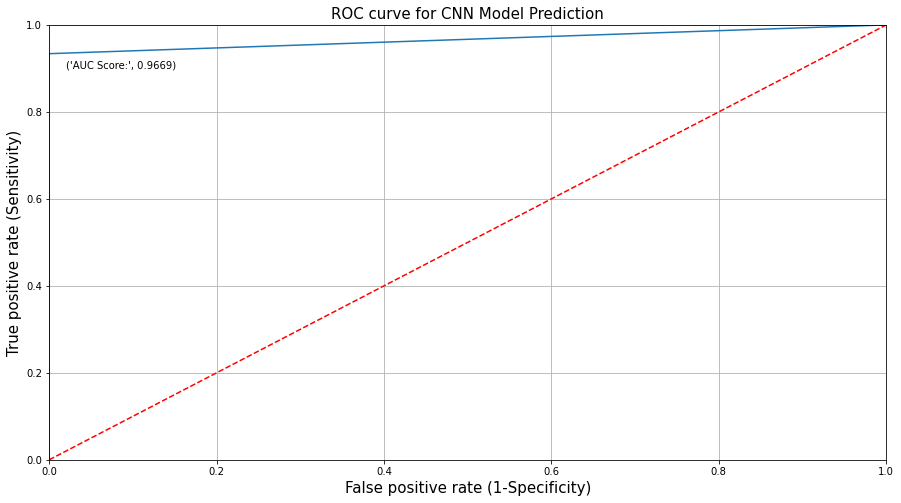

In [71]:
# ROC Curve for CNN Model

fpr, tpr, thresholds = roc_curve(dfc2['class'], dfc2['CNN Model'])

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for CNN Model Prediction', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(dfc2['class'], dfc2['CNN Model']),4)))
                               
# plot the grid
plt.grid(True)

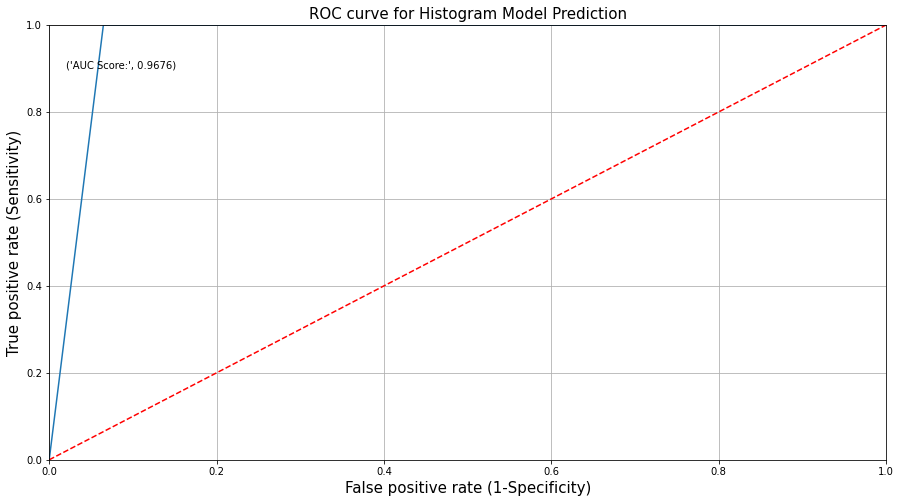

In [72]:
# ROC Curve for Histogram Prediction

fpr, tpr, thresholds = roc_curve(dfc2['class'], dfc2['Histogram Prediction'])

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Histogram Model Prediction', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(dfc2['class'], dfc2['Histogram Prediction']),4)))
                               
# plot the grid
plt.grid(True)

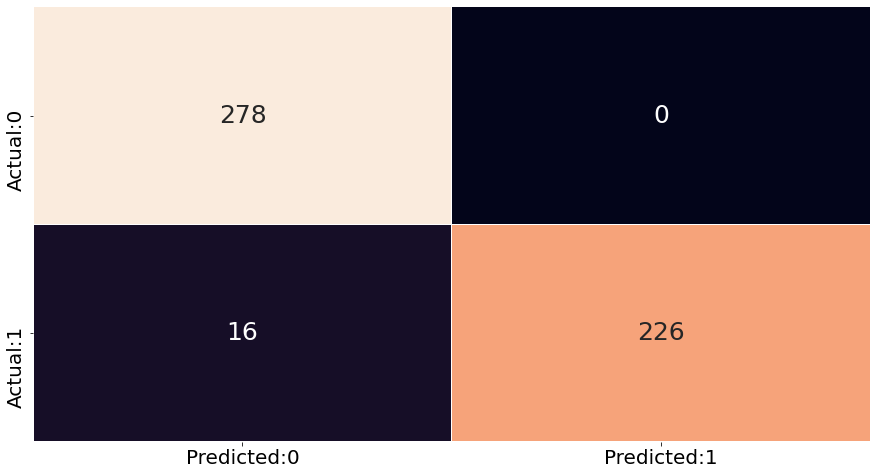

In [73]:
# Confusion Matrix for CNN Model

import seaborn as sns
cm = confusion_matrix(dfc2['class'], dfc2['CNN Model'])
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

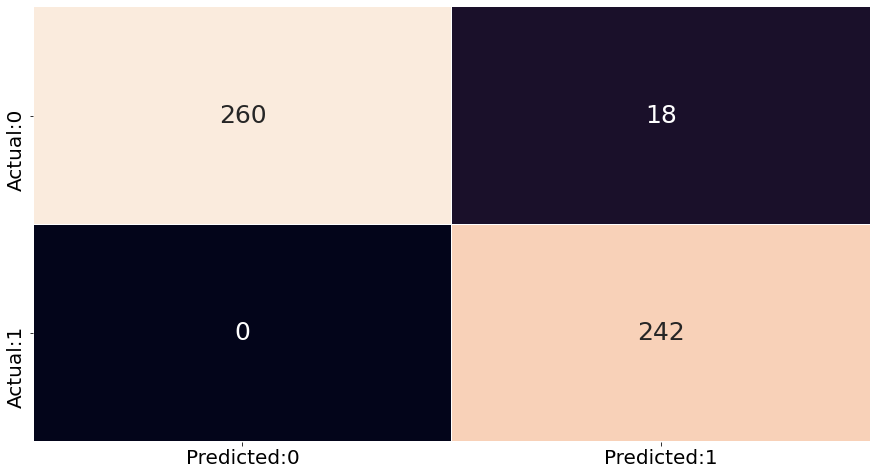

In [74]:
# Confusion Matrix for Histogram based Model

import seaborn as sns
cm = confusion_matrix(dfc2['class'], dfc2['Histogram Prediction'])
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()